# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dimas Fajar Ramadhan
- **Email:** deemasfajr@gmail.com
- **ID Dicoding:** dms_fr_Yc4n

## Menentukan Pertanyaan Bisnis

1. Bagaimana perkembangan rental sepeda dalam satu tahun? (perbulan)
2. Pesan apa yang dapat kita simpulkan melalui analisis faktor(day, temp, hum,season,dan weathersit)
3. Apakah ada hubungan banyaknya jumlah rental dengan jenis orang yang merental (cssual dan registered)

## Import Semua Packages/Library yang Digunakan

In [333]:
import numpy as np
import scipy as sc
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [108]:
df= pd.read_csv("C:/Users/luxha/Python data 101/Data Buat Latihan/biking/hour.csv")
df_day= pd.read_csv("C:/Users/luxha/Python data 101/Data Buat Latihan/biking/day.csv")

### Assessing Data

In [258]:
df.describe()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day-off
count,16678.000000,16678,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000
mean,8498.037774,2011-12-25 03:37:55.524643328,2.486749,0.483211,6.507195,11.419055,0.029740,2.996163,0.679158,1.433625,0.491198,0.470684,0.631897,0.189325,32.294040,135.204281,167.498321,0.320842
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4179.250000,2011-06-28 00:00:00,1.000000,0.000000,3.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,31.000000,37.000000,0.000000
50%,8365.500000,2011-12-20 00:00:00,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.640000,0.164200,15.000000,109.000000,133.000000,0.000000
75%,12782.250000,2012-06-21 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,44.000000,204.000000,259.000000,1.000000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,326.000000,582.000000,592.000000,1.000000
std,5007.141335,NaN,1.114228,0.499733,3.471059,6.981710,0.169874,2.011983,0.466814,0.644162,0.192469,0.171951,0.192443,0.122511,43.724154,120.534711,148.232031,0.466814


In [111]:
def detect_outliers(data):

    
    outliers=[]
    
    
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    
    IQR = Q3 - Q1
    
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [112]:
outlier=detect_outliers(df['cnt'])
outlier


5536     651
10358    644
10359    712
10382    676
10383    734
        ... 
16885    724
16909    688
16933    679
17053    662
17077    678
Name: cnt, Length: 505, dtype: int64

In [113]:
outlier.count()

np.int64(505)

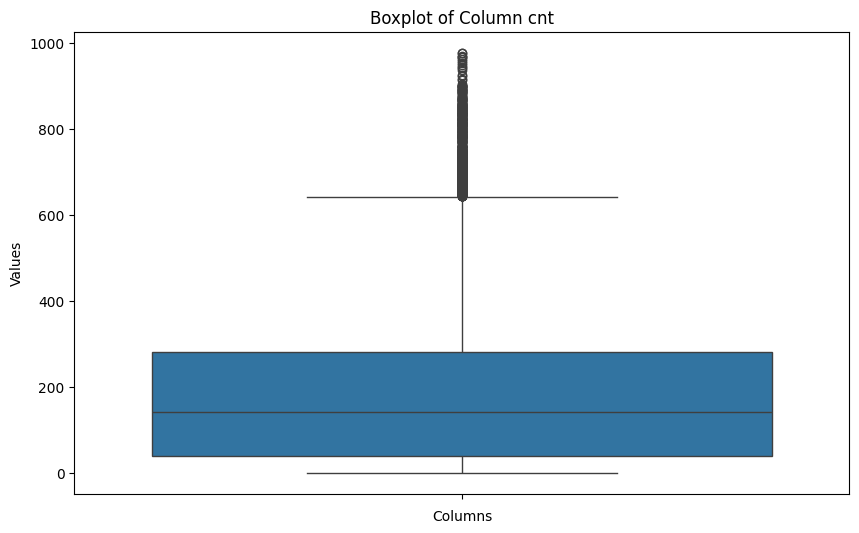

505


In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['cnt'])
plt.title('Boxplot of Column cnt')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

print(outlier.count())

dapat terlihat kebanyakan outlier berada di diluar IQR 3 atau cenderung ke kanan atau ataus, penyebabnya kemungkinan kemungkinan terdapat nilai yang kontras terhadap rentang waktu tertentu. Untuk pembersihan data berdasarkan outlier akan dibahas lebih lanjut ke bagian cleaning data.

### Cleaning Data

In [115]:
## sebelumnya siapkan data versi tampungan cleaned
dfclean=df

1. Dimulai dengan konversi data 'dteday' menjadi format datetime (sebelunmnya berjenis object)

In [116]:
def converse_date(date):
    x=pd.to_datetime(date)
    return x

In [117]:
dfclean['dteday']=converse_date(df['dteday'])

2. Hanya untuk tambahan saja ( berguna dalam exploratory data dan visualiasi). Ditambaha kolom hari yang menggunakan beberapa blok kode untuk mengonversi tanggal menjadi data berupa nama hari yang mendeskriosiskan beberapa baris data.

In [118]:
def get_day_name(date_str):
    return date_str.strftime('%A')##ambil hari. %A biasanya untuk konversi 7 hari penuh


In [119]:
dfclean['day'] = df['dteday'].apply(get_day_name) ##untuk masukan data mengenai hari

3. Eliminasi outlier

In [160]:
def remove_outliers(data,column):

    
    drops=[]
    
    
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    
    
    IQR = Q3 - Q1
    
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    drops = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index.tolist()
    data.drop(drops,inplace=True)

    
    
    return data

In [165]:
remove_outliers(dfclean,'cnt')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,day-off
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Saturday,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Saturday,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Saturday,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Saturday,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Saturday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,Monday,0
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,Monday,0
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,Monday,0
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,Monday,0


4. Menambahakan status tanggal libur

In [122]:
dfclean['day-off'] = 0  
dfclean.loc[(dfclean['holiday'] == 1) | (dfclean['day'].isin(["Sunday", "Saturday"])), 'day-off'] = 1


5. Menambahakan dteday berdasarkan bulan untuk visualisasi data selanjutnya

In [255]:

dfclean['dtedaymnth']=dfclean['dteday'].dt.strftime('%y-%m')

dfclean['dtedaymnth']


0        11-01
1        11-01
2        11-01
3        11-01
4        11-01
         ...  
17374    12-12
17375    12-12
17376    12-12
17377    12-12
17378    12-12
Name: dtedaymnth, Length: 16678, dtype: object

## Exploratory Data Analysis (EDA)

6. Menambahkan data yang membuat semacam perbandingan casual dan registered (minus akan menujukan casual dan plus menunjukan registered)

In [343]:
dfclean["CasulRatio"]= dfclean['registered']-dfclean['casual']

### Explore ...

In [344]:
dfclean.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,day,day-off,dtedaymnth,CasulRatio
count,16678.000000,16678,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,...,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678,16678.000000,16678,16678.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,24,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,NaN,11-07,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2446,NaN,742,NaN
mean,8498.037774,2011-12-25 03:37:55.524643328,2.486749,0.483211,6.507195,11.419055,0.029740,2.996163,0.679158,1.433625,...,0.470684,0.631897,0.189325,32.294040,135.204281,167.498321,NaN,0.320842,NaN,102.910241
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,-131.000000
25%,4179.250000,2011-06-28 00:00:00,1.000000,0.000000,3.000000,5.000000,0.000000,1.000000,0.000000,1.000000,...,0.333300,0.480000,0.104500,4.000000,31.000000,37.000000,NaN,0.000000,NaN,23.000000
50%,8365.500000,2011-12-20 00:00:00,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,...,0.484800,0.640000,0.164200,15.000000,109.000000,133.000000,NaN,0.000000,NaN,75.000000
75%,12782.250000,2012-06-21 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,0.621200,0.790000,0.253700,44.000000,204.000000,259.000000,NaN,1.000000,NaN,144.000000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,1.000000,1.000000,0.850700,326.000000,582.000000,592.000000,NaN,1.000000,NaN,572.000000


<class 'pandas.core.frame.DataFrame'>
Index: 16678 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16678 non-null  int64         
 1   dteday      16678 non-null  datetime64[ns]
 2   season      16678 non-null  int64         
 3   yr          16678 non-null  int64         
 4   mnth        16678 non-null  int64         
 5   hr          16678 non-null  int64         
 6   holiday     16678 non-null  int64         
 7   weekday     16678 non-null  int64         
 8   workingday  16678 non-null  int64         
 9   weathersit  16678 non-null  int64         
 10  temp        16678 non-null  float64       
 11  atemp       16678 non-null  float64       
 12  hum         16678 non-null  float64       
 13  windspeed   16678 non-null  float64       
 14  casual      16678 non-null  int64         
 15  registered  16678 non-null  int64         
 16  cnt         16678 non-null 

Terdapat data berupa dfclean (hasil filtrasi). pesanan terbanyak dalam 1 jam berupa 592 buah sepeda dan tersedikit  1 buah sepeda. Setelah itu kita akan mengeksplorasi data berkenan dengan waktu.

In [124]:
dfclean.groupby("day").agg({
    'cnt': 'sum'
}).reset_index().sort_values(by="cnt",ascending=False)

,day,cnt
0,Friday,437716
2,Saturday,435804
3,Sunday,424861
4,Thursday,412505
5,Tuesday,403054
1,Monday,401536
6,Wednesday,398835


dapat terlihat penjualan servis rental sepeda terbanyak di hari weekend dan workday menjelang weekday (jumat). kemungkinan mengikuti pola para pekerja atau siswa dalam menikmati liburaannya menggunakan sepeda.

In [125]:
dfclean.groupby(by="yr").agg({
    'cnt': 'sum'
}).reset_index()

,yr,cnt
0,0,1242452
1,1,1671859


Tahun 2011 menuju 2022 mengalami pertumbuhan

In [126]:
dfclean.groupby(by="mnth").agg({
    'cnt': 'sum'
}).reset_index().sort_values(by="cnt",ascending=False)

,mnth,cnt
6,7,304686
5,6,301669
4,5,297717
7,8,297281
8,9,274187
9,10,268756
10,11,240590
3,4,238137
2,3,203142
11,12,201861


Bulan tertinggi dalam penjumlahan adalah juli diikuti juni dan mei.

In [127]:
dfclean.groupby(by="season").agg({
    'cnt': 'sum'
}).reset_index().sort_values(by="cnt",ascending=False)

,season,cnt
2,3,909146
1,2,805771
3,4,741576
0,1,457818


season tertinggi yaitu musim gugur

In [128]:
dfclean.groupby(by="hr").agg({
    'cnt': 'sum'
}).reset_index().sort_values(by="cnt",ascending=False).head()

,hr,cnt
16,16,219529
19,19,217395
17,17,214962
18,18,209297
15,15,174172


In [143]:
dfclean.groupby(["yr","mnth"]).agg({
    'cnt': 'sum'
}).reset_index()

,yr,mnth,cnt
0,0,1,38189
1,0,2,48215
2,0,3,64045
3,0,4,94870
4,0,5,135821
5,0,6,143512
6,0,7,141341
7,0,8,136040
8,0,9,127418
9,0,10,123511


Jam yang mendominasi penjulana berada di sore-petang hari

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\luxha\AppData\Local\Temp\ipykernel_25180\3635400212.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dfclean, x='dtedaymnth', y='cnt', marker='o', color='red',label='trend', ci=None)


Text(0.5, 1.0, 'Monthly Bike Rentals Trend (2011 vs 2012)')

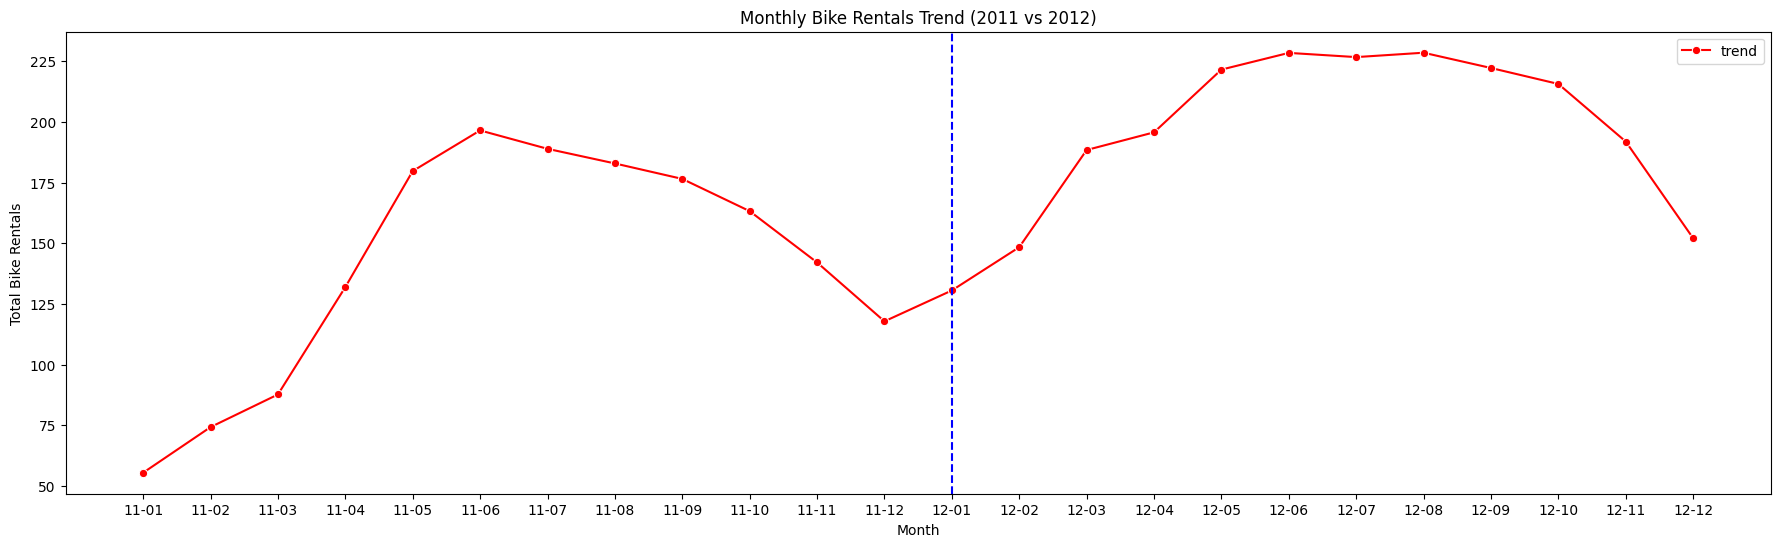

In [256]:

plt.figure(figsize=(22, 6))


sns.lineplot(data=dfclean, x='dtedaymnth', y='cnt', marker='o', color='red',label='trend', ci=None)

# Adding a vertical line for year divider
plt.axvline(x='12-01', color='blue', linestyle='--', label='Divider')


plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.title('Monthly Bike Rentals Trend (2011 vs 2012)')






### Pertanyaan 2:

C:\Users\luxha\AppData\Local\Temp\ipykernel_25180\2899404727.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()


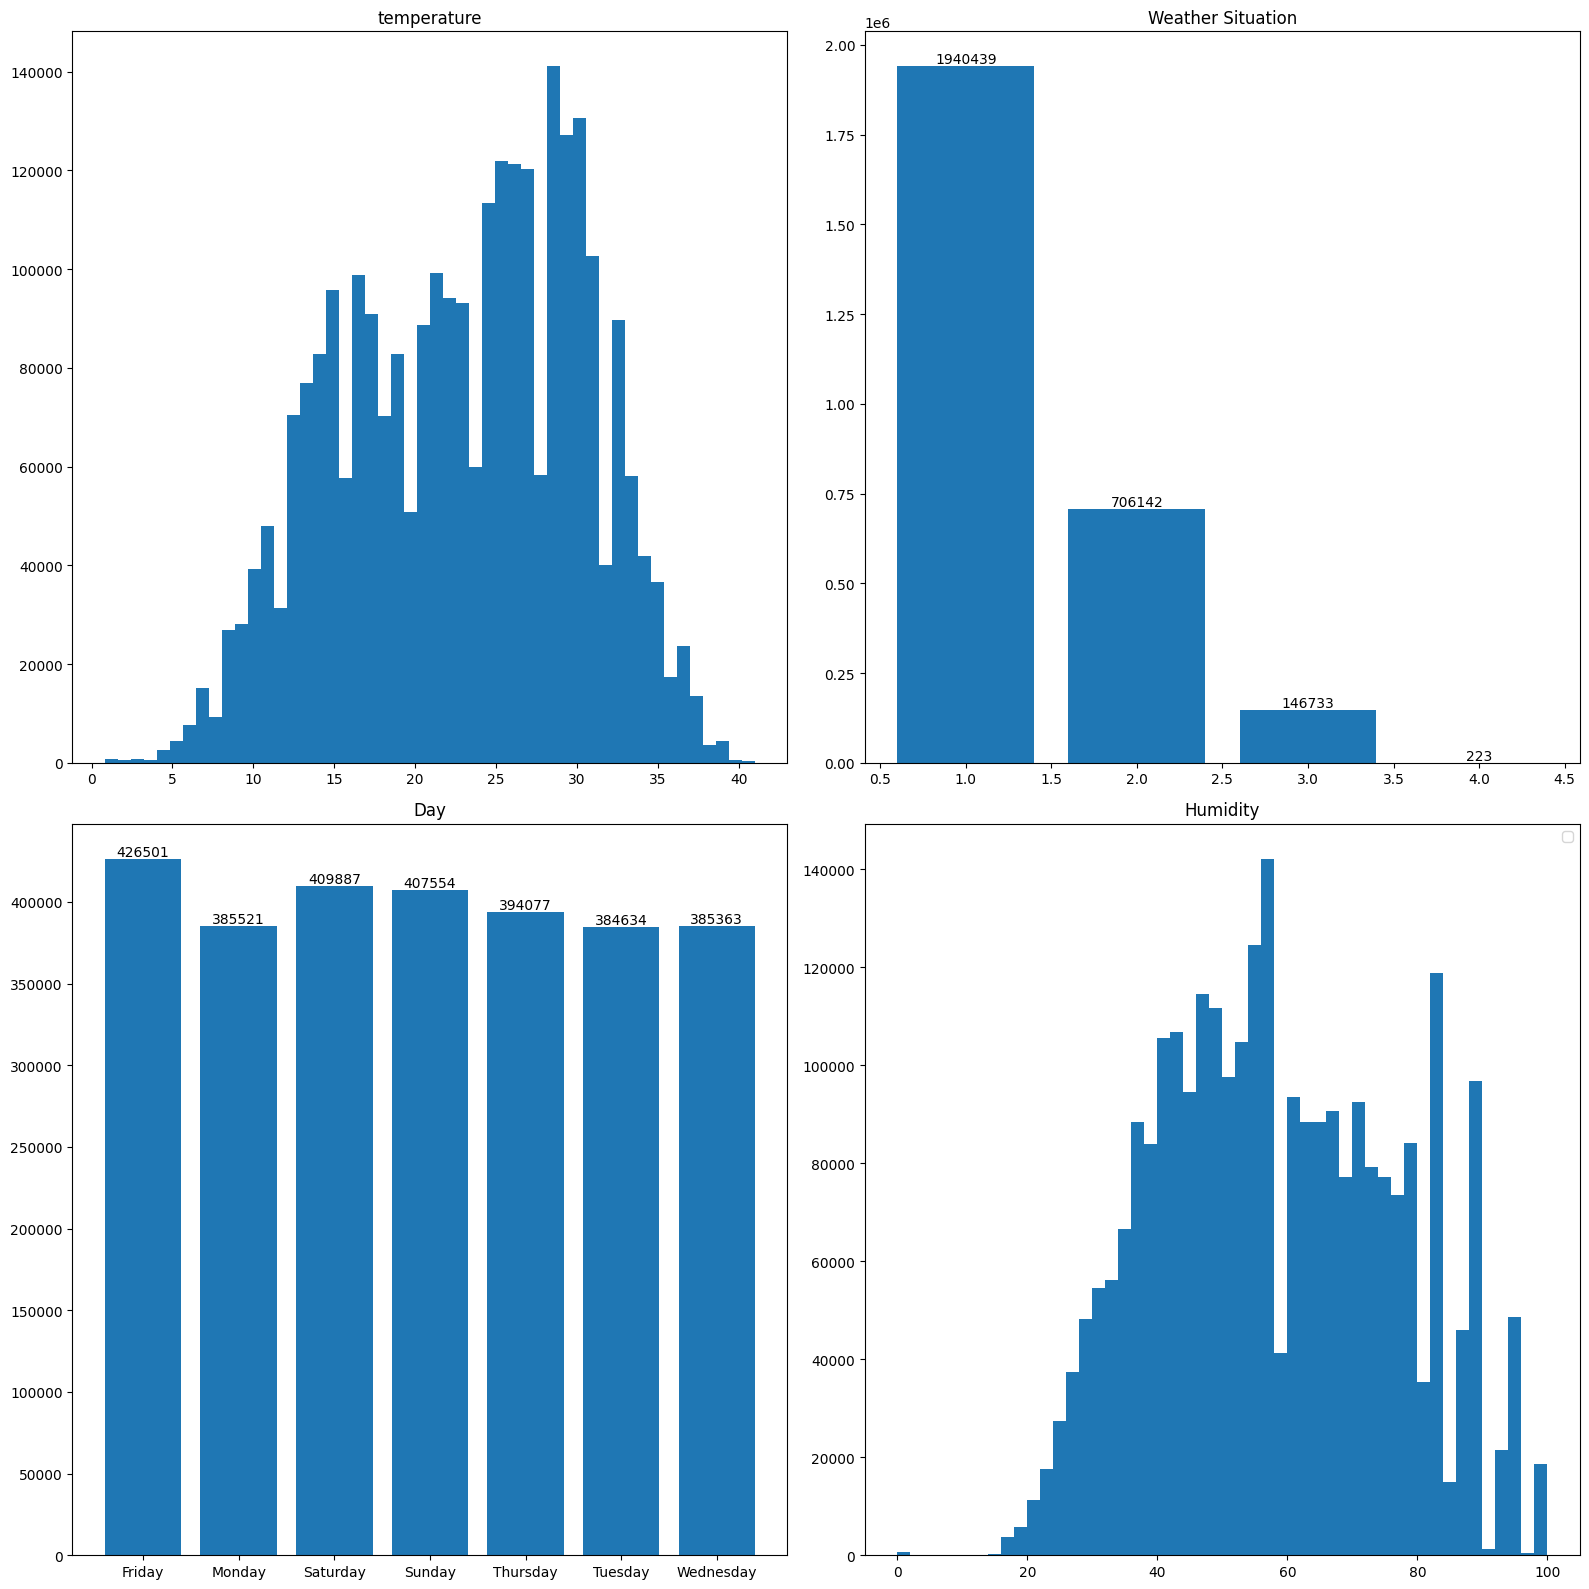

In [353]:

fig, axs = plt.subplots(2, 2, figsize=(16, 16))
weather_agg = dfclean.groupby('weathersit')['cnt'].sum().reset_index()
day_agg = dfclean.groupby('day')['cnt'].sum().reset_index()



axs[0, 0].hist(dfclean['temp']*41,weights=dfclean['cnt'], bins=50)
axs[0, 0].set_title("temperature")



bars = axs[0, 1].bar(weather_agg['weathersit'], weather_agg['cnt'])
axs[0, 1].set_title('Weather Situation')


for bar, count in zip(bars, weather_agg['cnt']):
    height = bar.get_height()
    axs[0, 1].text(bar.get_x() + bar.get_width() / 2, height, str(count), ha='center', va='bottom')


bars_day = axs[1, 0].bar(day_agg['day'], day_agg['cnt'])
axs[1, 0].set_title('Day')


for bar, count in zip(bars_day, day_agg['cnt']):
    height = bar.get_height()
    axs[1, 0].text(bar.get_x() + bar.get_width() / 2, height, str(count), ha='center', va='bottom')


axs[1, 1].hist(dfclean['hum']*100,weights=dfclean['cnt'], bins=50)
axs[1, 1].set_title('Humidity')
axs[1, 1].legend()



plt.tight_layout()
plt.show()

### Pertanyaan 3:

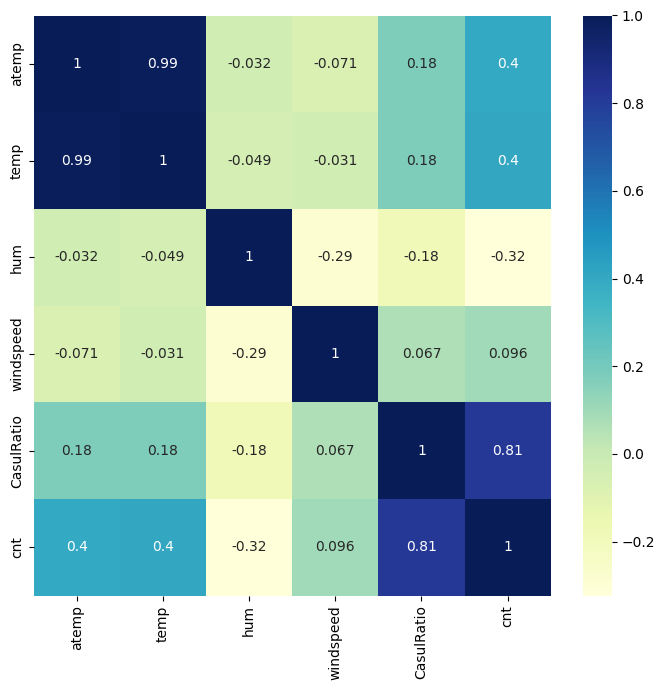

In [351]:
plt.figure(figsize=(7, 7))
dataplot = sns.heatmap(dfclean.loc[:,['atemp','temp','hum','windspeed','CasulRatio','cnt']].corr(), cmap="YlGnBu", annot=True)
plt.tight_layout() 

## Conclusion

- Conclution pertanyaan 1:
Data yang ada menunjukkan fluktuasi yang cukup besar dalam jumlah sewa sepeda, dan faktor eksternal seperti cuaca dan acara kemungkinan besar berperan yang tentu akan dibahas di bawah.
- Conclution pertanyaan 2:
Penjualan jasa peminjaman sepeda dipeangruhi oleh faktor seperti suhu yang memadai (condong ke 20c samapi 40c), situasi cuaca yang lebih jinak, hariyang menjelang weekend dan weekend itu sendiri, dan kelembapan sekitar 40 sampai 60 persen.
- Conclution pertanyaan 3:
Berdasarkan analisis matriks korelasi ini, dapat disimpulkan bahwa:

1) Cuaca hangat merupakan faktor utama yang mendorong orang untuk menyewa sepeda.
2) Kelembapan yang tinggi cenderung mengurangi minat orang untuk bersepeda.
3) memberhip memainkan peran penting dalam total jumlah penyewaan sepeda.
4) Kecepatan angin tampaknya tidak memiliki pengaruh yang signifikan.

In [354]:
dfclean.to_csv("C:/Users/luxha/Python data 101/Data Buat Latihan/biking/dfclean.csv")